<a href="https://colab.research.google.com/github/yasodarai/machine-learning/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Detecting breast cancer

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data
from google.colab import files
uploaded = files.upload()
df= pd.read_csv('cancerdata.csv')
df


Saving cancerdata.csv to cancerdata (1).csv


,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell shape,Marginal Adhension,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# Total number of rows and column
df.shape

(699, 11)

In [ ]:
# Total number of Benign(2) and Malignant(4)
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


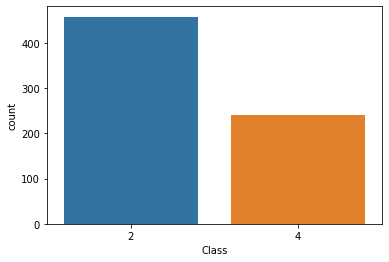

In [ ]:
# Visualizing the count
sns.countplot(df['Class'] ,label='Count')

In [ ]:
missing_value=["?"]
df= pd.read_csv('cancerdata.csv', na_values= missing_value)
df.head(141)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell shape,Marginal Adhension,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
136,1182404,4,1,1,1,2,1.0,2,1,1,2
137,1182410,3,1,1,1,2,1.0,1,1,1,2
138,1183240,4,1,2,1,2,1.0,2,1,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2


In [ ]:
#Number of empty values
df.isna().sum()

id                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell shape        0
Marginal Adhension              0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nuclei                   0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
#Filling missing values with mean
df.fillna(df.mean(), inplace=True)

In [ ]:
#Show the number of null values
df.isna().sum()

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell shape       0
Marginal Adhension             0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nuclei                  0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# Checking data types
df.dtypes

id                               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell shape         int64
Marginal Adhension               int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nuclei                    int64
Mitoses                          int64
Class                            int64
dtype: object

In [ ]:
df['Clump Thickness'] = df['Clump Thickness'].astype(float)
df['Uniformity of Cell Size'] = df['Uniformity of Cell Size'].astype(float)
df['Uniformity of Cell shape'] = df['Uniformity of Cell shape'].astype(float)
df['Marginal Adhension'] = df['Marginal Adhension'].astype(float)
df['Single Epithelial Cell Size'] = df['Single Epithelial Cell Size'].astype(float)
df['Bland Chromatin'] = df['Bland Chromatin'].astype(float)
df['Normal Nuclei'] = df['Normal Nuclei'].astype(float)
df['Mitoses'] = df['Mitoses'].astype(float)
df['Class'] = df['Class'].astype(float)
df.dtypes

id                               int64
Clump Thickness                float64
Uniformity of Cell Size        float64
Uniformity of Cell shape       float64
Marginal Adhension             float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nuclei                  float64
Mitoses                        float64
Class                          float64
dtype: object

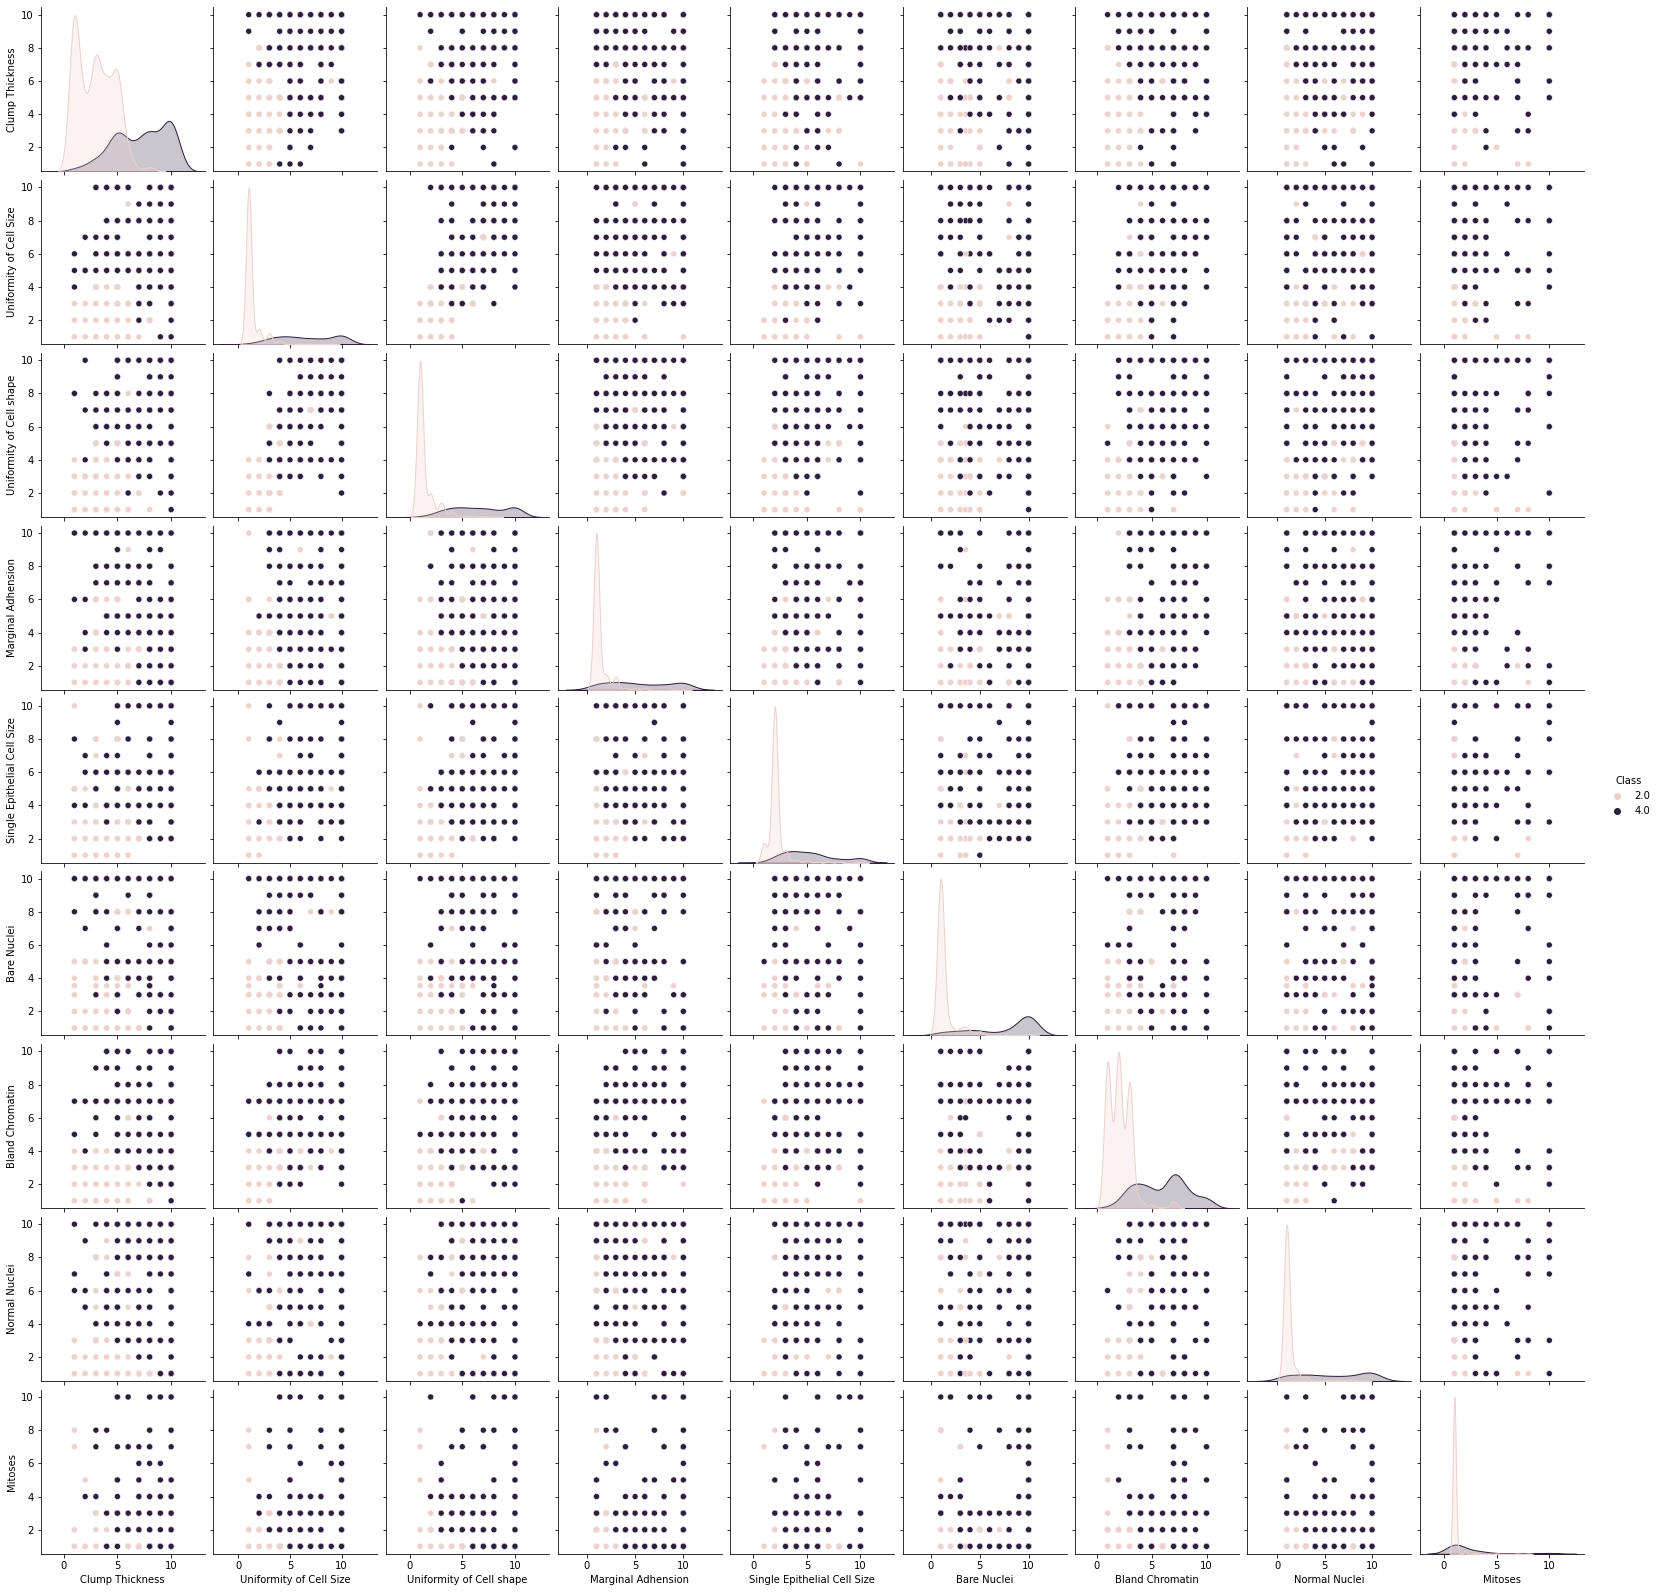

In [ ]:
# Create a pair plot
sns.pairplot(df.iloc[:,1:11], hue='Class')


In [ ]:
#Finding correlation
df.iloc[:,1:11].corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell shape,Marginal Adhension,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
Marginal Adhension,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
Normal Nuclei,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816050,0.756616,0.712244,0.423170,1.000000


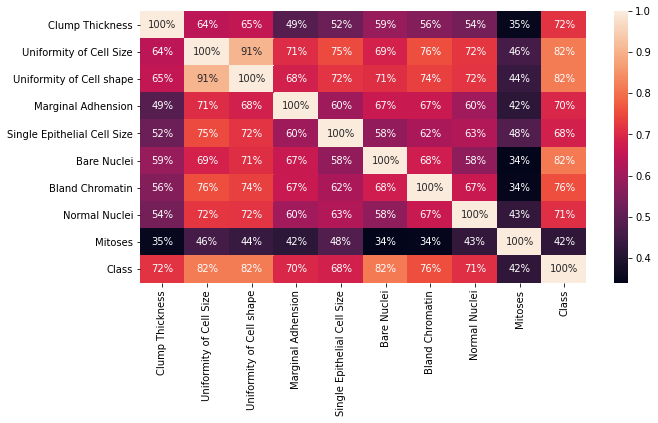

In [ ]:
#Visualizing the correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.iloc[:,1:11]. corr(), annot= True, fmt='.0%')

In [ ]:
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell shape       0.818934
Marginal Adhension             0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.816050
Bland Chromatin                0.756616
Normal Nuclei                  0.712244
Class                          1.000000
Name: Class, dtype: float64

In [ ]:
# dropping Mitoses column
df= df.drop(['Mitoses'], axis = 1)
df
 

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell shape,Marginal Adhension,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,2.0
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,2.0
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0
695,841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
696,888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,4.0
697,897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,4.0


In [ ]:
# Split datasets into independent X and dependent Y datasets
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [ ]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
 
#Import svm model
from sklearn.svm import SVC
svc_model= SVC()
svc_model.fit(X_train, Y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy of SVM: 0.9642857142857143
Precison of SVM: 0.9529411764705882
Sensitivity of SVM: 0.9878048780487805
Specificity of SVM: 0.9310344827586207


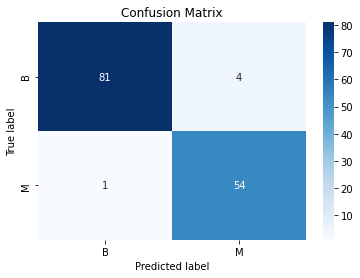

In [ ]:
Y_predict1=svc_model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_predict1)
sns.heatmap(cm1,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
TP= cm1[0][0]
TN= cm1[1][1]
FN= cm1[1][0]
FP= cm1[0][1]

print('Accuracy of SVM:', (TP+TN)/(TP+TN+FN+FP))
print('Precison of SVM:', (TP)/(TP+FP))
print('Sensitivity of SVM:', (TP)/(TP+FN))
print('Specificity of SVM:', (TN)/(TN+FP))


In [ ]:

#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Accuracy of Decision tree: 0.95
Precison of Decision tree: 0.9764705882352941
Sensitivity of Decision tree: 0.9431818181818182
Specificity of Decision tree: 0.9615384615384616


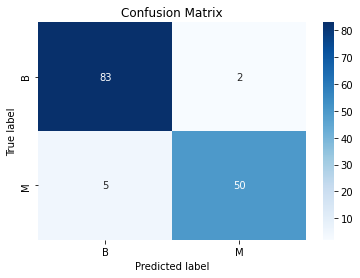

In [ ]:
Y_predict2=tree.predict(X_test)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test, Y_predict2)
sns.heatmap(cm2,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
TP= cm2[0][0]
TN= cm2[1][1]
FN= cm2[1][0]
FP= cm2[0][1]

print('Accuracy of Decision tree:', (TP+TN)/(TP+TN+FN+FP))
print('Precison of Decision tree:', (TP)/(TP+FP))
print('Sensitivity of Decision tree:', (TP)/(TP+FN))
print('Specificity of Decision tree:', (TN)/(TN+FP))





In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='adam', max_iter=600)
mlp.fit(X_train,Y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Accuracy of MLP: 0.9714285714285714
Precison of MLP: 0.9647058823529412
Sensitivity of MLP: 0.9879518072289156
Specificity of MLP: 0.9473684210526315


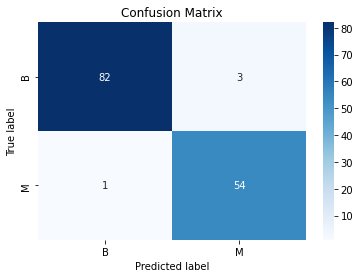

In [ ]:
Y_predict3=mlp.predict(X_test)
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(Y_test, Y_predict3)
sns.heatmap(cm3,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
TP= cm3[0][0]
TN= cm3[1][1]
FN= cm3[1][0]
FP= cm3[0][1]

print('Accuracy of MLP:', (TP+TN)/(TP+TN+FN+FP))
print('Precison of MLP:', (TP)/(TP+FP))
print('Sensitivity of MLP:', (TP)/(TP+FN))
print('Specificity of MLP:', (TN)/(TN+FP))



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#Score for individual model

print('DT: {}'.format(tree.score(X_test, Y_test)))
print('SVM: {}'.format(svc_model.score(X_test, Y_test)))
print('MLP: {}'.format(mlp.score(X_test, Y_test)))


DT: 0.95
SVM: 0.9642857142857143
MLP: 0.9714285714285714


In [ ]:
#create a dictionary of our models
estimators=[('DT',tree),('svm',svc_model),('MLP', mlp)]

In [ ]:
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=0,
   

Accuracy of Voting: 0.9785714285714285
Precison of Voting: 0.9764705882352941
Sensitivity of Voting: 0.9880952380952381
Specificity of Voting: 0.9642857142857143


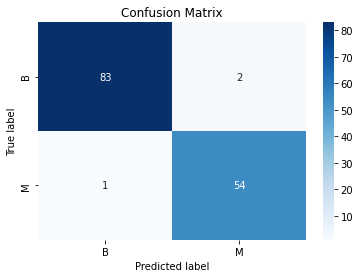

In [ ]:
Y_predict4=ensemble.predict(X_test)
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(Y_test, Y_predict4)
sns.heatmap(cm4,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
TP= cm4[0][0]
TN= cm4[1][1]
FN= cm4[1][0]
FP= cm4[0][1]

print('Accuracy of Voting:', (TP+TN)/(TP+TN+FN+FP))
print('Precison of Voting:', (TP)/(TP+FP))
print('Sensitivity of Voting:', (TP)/(TP+FN))
print('Specificity of Voting:', (TN)/(TN+FP))




In [ ]:
#create a dictionary of our models
estimators=[ ('MLP', mlp),('svm', svc_model)]

In [ ]:
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('MLP',
                              MLPClassifier(activation='relu', alpha=0.0001,
                                            batch_size='auto', beta_1=0.9,
                                            beta_2=0.999, early_stopping=False,
                                            epsilon=1e-08,
                                            hidden_layer_sizes=(5, 5, 5),
                                            learning_rate='constant',
                                            learning_rate_init=0.001,
                                            max_fun=15000, max_iter=600,
                                            momentum=0.9, n_iter_no_change=10,
                                            nesterovs_momentum=True,
                                            power_t=0.5, random_state=None,
                                            s...
                                            tol=0.0001, validation_fraction=0.1,
                               

In [ ]:
Y_predict4=ensemble.predict(X_test)
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(Y_test, Y_predict4)
cm5


array([[81,  4],
       [ 1, 54]])

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy: {}".format(ensemble.score(X_test, Y_test)))
print(classification_report(Y_test, Y_predict5))

Accuracy: 0.9642857142857143


NameError: ignored